# 4th session - drawing and organizational mining

## 목적

- 지난번에는 알파알고리즘을 구현했고 이를 그림으로 보여주었는데, 아무래도 matplotlib.pyplot만을 활용해서 그림을 그리다보니 별로 예쁘지 않음
- 여기서는 graphviz를 사용해서 그림을 그림. 특히, networkx를 함께 사용해서 좀더 편하게 그릴 수 있음 

## 그래서 graphviz라는 것을 사용해보았습니다. 

- Graphviz (short for Graph Visualization Software) is a package of open-source tools initiated by AT&T Labs Research for **drawing graphs specified in DOT language scripts**.
- 그냥 dot language를 사용한 그래프 시각화 소프트웨어, 
- python에서 사용하기 위해서는 graphviz 설치 이후 pygraphviz도 함께 설치해주어야 함. 
- 이 과정에서 이런저런 문제가 많이 진짜 나는데, 화이팅!

![ㅇㅇ](http://2runzzal.com/uploads/zpicture/thum/82f47f35c60762732aab31cba9f0a4b4f07fb699520d4a4af30813f6f70f8fca.jpg)

- 책 'primer on process mining'에서도 graphviz를 사용함
- https://en.wikipedia.org/wiki/Graphviz

## dot language??

- python도 못하는데 또 무슨 언어를 배워 시벌 이라고 생각할 수 있지만, 뭐 간단한것만 알면 됩니다. 
- plain text graph description language 입니다. 이것말 알고 넘어가고, 궁금하시면 위키피디아를 보세여
https://en.wikipedia.org/wiki/DOT_(graph_description_language)

## graphviz install

- [Graphviz](https://graphviz.gitlab.io/download/)
- [pygrphviz](https://pygraphviz.github.io/download.html)
- 앞서 말한것처럼 설치했는데 안되는 일이 꽤 많습니다. 화이팅!!
- 다 설치하고, 파이썬에서 는 `import graphviz` 로 라이브러리 임포트

## dot language example

- 아래처럼 그냥 텍스트로 파일 만들어도 아무 문제가 없습니다. 

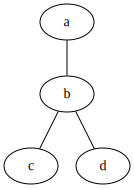

In [34]:
import graphviz 
f = open("text1.gv", "w")
f.write("""
graph graphname {
     a -- b -- c;
     b -- d;
 }
""")
f.close()
graphviz.Source.from_file("text1.gv")

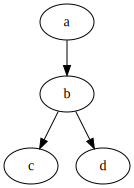

In [35]:
import graphviz 
f = open("text1.gv", "w")
f.write("""
digraph graphname {
     a -> b -> c;
     b -> d;
}
""")
f.close()
graphviz.Source.from_file("text1.gv")

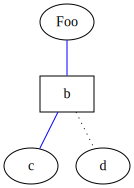

In [36]:
import graphviz 
f = open("text1.gv", "w")
f.write("""
graph graphname {
     // This attribute applies to the graph itself
     size="5,5";
     // The label attribute can be used to change the label of a node
     a [label="Foo"];
     // Here, the node shape is changed.
     b [shape=box];
     // These edges both have different line properties
     a -- b -- c [color=blue];
     b -- d [style=dotted];
     // [style=invis] hides a node.
}
""")
f.close()
graphviz.Source.from_file("text1.gv")

In [37]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import itertools as ittls
import functools 
import matplotlib.pyplot as plt
import networkx as nx
import graphviz
from graphviz import Digraph

- 앞에서 보여준 것처럼 dot language를 바로 보여주는 것도 괜찮은 방법이지만,
- 이보다는 아래처럼 node, edge를 method로 넣어주는 것이 파이썬에서는 일반적인 방법

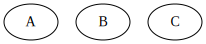

In [38]:
#what is dot language
dot = Digraph(comment="The Round Table")
dot.node("A")
dot.node("B")
dot.node("C")
dot.save("test.gv")
#print(dot.source)
graphviz.Source.from_file("test.gv")

// The Round Table
digraph {
	A
	B
	C
	A -> B
	A -> C
}


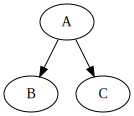

In [39]:
dot.edge("A", "B")
dot.edge("A", "C")
dot.save("test.gv")
print(dot.source)
graphviz.Source.from_file("test.gv")

- alpha algorithm을 활용해서 place, transition, flow를 구분하고 이를 networkx의 Digraph(Directional Graph)로 세팅한다. 
    - networkx.DiGraph는 그래프 데이터를 담기 위한 데이터 구조라고 생각하면 됨.
    - 각 node의 attr dict를 Type: "transition" or "place"로 구분함. 

In [40]:
P_L, T_L, F_L = alpha_algorithm(log5)

DG = nx.DiGraph()
DG.add_nodes_from([(T, {"Type":"transition"}) for T in T_L])
DG.add_nodes_from([ (P[0], {"Type":"place"}) for P in P_L])
DG.add_edges_from(F_L)

- 이제 앞서 나온 DiGraph를 graphviz로 표현함.

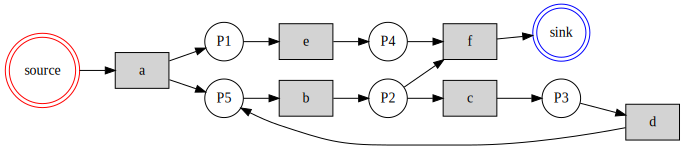

In [41]:
import graphviz
from graphviz import Digraph

process_by_alpha = Digraph(comment="this petri net is derived from alpha algorithm")
process_by_alpha.attr(rankdir="LR")
for node in DG.nodes(data=True):
    if node[1]["Type"]=='place':
        if node[0]=="source":
            process_by_alpha.node(node[0], shape="doublecircle", color='red')
        elif node[0]=="sink":
            process_by_alpha.node(node[0], shape="doublecircle", color='blue')
        else:
            process_by_alpha.node(node[0], shape="circle")
    elif node[1]["Type"]=='transition':
        process_by_alpha.node(node[0], shape="rectangle", style='filled')
    else:
        print("error: not defined node type")
for edge in DG.edges(data=True):
    process_by_alpha.edge(edge[0], edge[1])

process_by_alpha.save("process model by alpha.gv")
graphviz.Source.from_file("process model by alpha.gv")

- 그리고 보니, ProM에서 그려주는 것과 매우 유사하다는 생각을 하게 됨. 

## Organizational mining(basic)

- coursera에서 사용하던 데이터를 활용
- 기본적인 알고리즘만 구현

In [42]:
import pandas as pd
df = pd.read_csv("running-example-non-conforming.csv", ";")
df.head()

Case ID  Event ID  dd-MM-yyyy:HH.mm            Activity Resource  Costs
0        1  35654423  30-12-2010:11.02    register request     Pete     50
1        1  35654424  31-12-2010:10.06  examine thoroughly      Sue    400
2        1  35654425  05-01-2011:15.12        check ticket     Mike    100
3        1  35654426  06-01-2011:11.18              decide     Sara    200
4        1  35654427  07-01-2011:14.24      reject request     Pete    200

In [43]:
# Resource-activity matrix
import numpy as np

activities = list(set(df["Activity"]))
resources = list(set(df["Resource"]))
R_A_matrix = {r:{a:0 for a in activities}for r in resources}
for i in range(0,len(df)):
    r = df.iloc()[i]['Resource']
    a = df.iloc()[i]['Activity']
    R_A_matrix[r][a]+=1
R_A_matrix = pd.DataFrame(R_A_matrix)
R_A_matrix = R_A_matrix.T
for column in R_A_matrix.columns:
    total_activity_count = np.sum(R_A_matrix[column])
    R_A_matrix[column] = R_A_matrix[column]/total_activity_count
R_A_matrix

check ticket  decide  examine casually  examine thoroughly  \
Ellen      0.266667     0.0          0.111111            0.000000   
Mike       0.266667     0.0          0.666667            0.000000   
Pete       0.466667     0.0          0.000000            0.000000   
Sara       0.000000     1.0          0.000000            0.000000   
Sean       0.000000     0.0          0.111111            0.857143   
Sue        0.000000     0.0          0.111111            0.142857   

       pay compensation  register request  reinitiate request  reject request  
Ellen               0.8               0.2                 0.0            0.25  
Mike                0.2               0.4                 0.0            0.50  
Pete                0.0               0.4                 0.0            0.25  
Sara                0.0               0.0                 1.0            0.00  
Sean                0.0               0.0                 0.0            0.00  
Sue                 0.0               0.0                 0.0            0.00

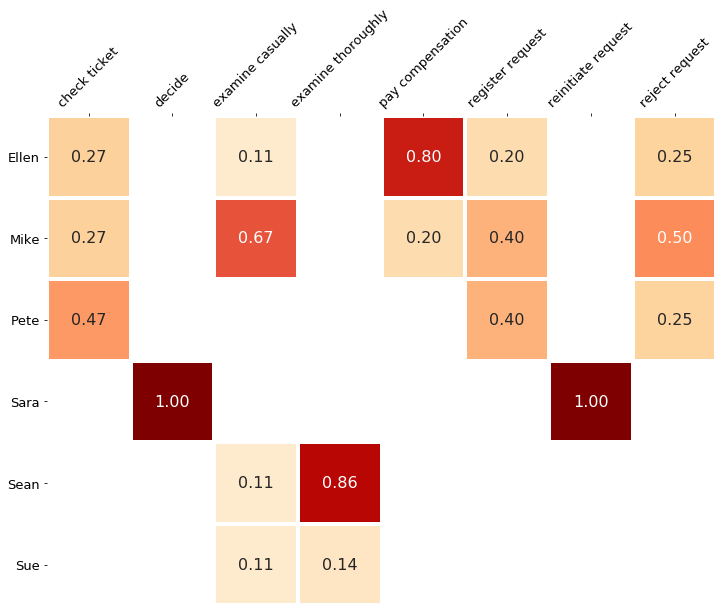

In [44]:
import seaborn as sns
plt.figure(figsize=(12, 9))
mask = R_A_matrix.applymap(lambda x: True if x==0 else False)
sns.heatmap(R_A_matrix, cmap="OrRd", 
            cbar=False,
            mask=mask,
            annot=True, annot_kws={"size": 16},
            fmt="0.2f", 
            linewidths=3)
plt.gca().xaxis.tick_top()
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tick_params(labelsize=13)
plt.show()

In [45]:
# social network based on similarity of profiles 
from scipy.spatial import distance

R_A_matrix.loc()["Ellen"]
R_R_matrix = {k1:{k2:{} for k2 in R_A_matrix.index} for k1 in R_A_matrix.index}
for k1 in R_A_matrix.index:
    for k2 in R_A_matrix.index:
        a = R_A_matrix.loc()[k1]
        b = R_A_matrix.loc()[k2]
        dst = distance.euclidean(a, b)
        R_R_matrix[k1][k2] = dst
R_R_matrix = pd.DataFrame(R_R_matrix)
R_R_matrix

Ellen      Mike      Pete      Sara      Sean       Sue
Ellen  0.000000  0.878147  0.855772  1.681058  1.244309  0.913247
Mike   0.878147  0.000000  0.766123  1.722079  1.250779  0.922042
Pete   0.855772  0.766123  0.000000  1.562139  1.089641  0.687773
Sara   1.681058  1.722079  1.562139  0.000000  1.657420  1.425747
Sean   1.244309  1.250779  1.089641  1.657420  0.000000  0.714286
Sue    0.913247  0.922042  0.687773  1.425747  0.714286  0.000000

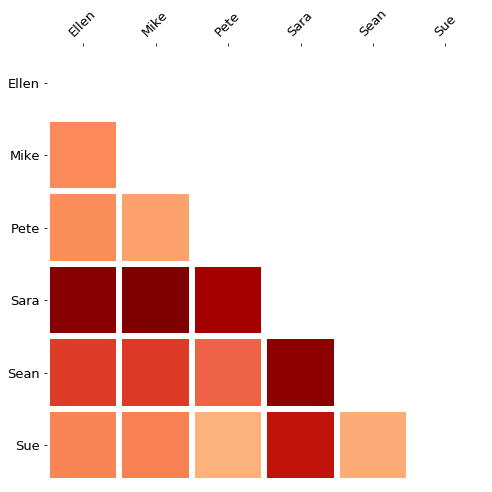

In [46]:
plt.figure(figsize=(8,8))
mask = np.zeros_like(R_R_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(R_R_matrix, cmap="OrRd", cbar=False, 
            mask=mask,
            linewidth=5, square=True)
plt.tick_params(labelsize=13)
plt.gca().xaxis.tick_top()
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## appendix 

- 알파알고리즘 구현해둔 것 가져옴 

In [47]:
log5 = [['a', 'b', 'e', 'f']]*2 + [['a', 'b', 'e', 'c', 'd', 'b', 'f']]*3 + [['a', 'b', 'c', 'e', 'd', 'b', 'f']]*2
log5 += [['a', 'b', 'c', 'd', 'e', 'b', 'f']]*4 + [['a', 'e', 'b', 'c', 'd', 'b', 'f']]*3
for i, trace in enumerate(log5):
    print("{} trace: {}".format(i+1, trace))    
# alpha algorithm
def return_unique_activities(input_log):
    a = [log_instance[i] for log_instance in input_log for i in range(0, len(log_instance))]
    return sorted(list(set(a)))
def return_all_direct_succession(input_log):
    return [ (instance[i], instance[i+1]) for instance in input_log for i in range(0, len(instance)-1) ]
def causality_matrix(input_log):
    uniq_activity = return_unique_activities(input_log)
    dir_successions = return_all_direct_succession(input_log)
    
    causality_matrix = { key1: {}for key1 in uniq_activity}
    for a1 in uniq_activity:
        for a2 in uniq_activity:
            if (a1, a2) in dir_successions and (a2, a1) in dir_successions:
                causality_matrix[a1][a2]="||"
            elif (a1, a2) in dir_successions and (a2, a1) not in dir_successions:
                causality_matrix[a1][a2]="->"
            elif (a1, a2) not in dir_successions and (a2, a1) in dir_successions:
                causality_matrix[a1][a2]="<-"
            else:
                causality_matrix[a1][a2]="#"
    return pd.DataFrame(causality_matrix).transpose()
def return_transitions(input_log):
    T_L = return_unique_activities(input_log)
    T_I = list(set( [instance[0] for instance in input_log]))
    T_O = list(set( [instance[-1] for instance in input_log]))
    return (T_L, T_I, T_O)
def find_subsets(lst):
    # A, B 내부 집단의 a끼리, b끼리는 관계가 없고, 모든 a, 모든 b 간에는 direct succession이 있는 것들
    subsets = [list(ittls.combinations(lst, i)) for i in range(1, len(lst)+1)]
    subsets = functools.reduce(lambda x, y: x+y, subsets)
    return subsets

def return_X_L(input_log):
    T_L, T_I, T_O = return_transitions(input_log)
    c_matrix = causality_matrix(input_log)
    A_s = find_subsets(T_L)[:-1]# remove last item
    AB_s = [(A, B) for A in A_s for B in find_subsets( list(set(T_L) - set(A)) )]
    def check_direction(A, B):
        return all( c_matrix.loc()[a][b]=="->" for a in A for b in B)
    def check_no_relation(A, B):
        return all( c_matrix.loc()[a][b]=="#" for a in A for b in B)
    AB_s = filter(lambda AB: check_direction(AB[0], AB[1]), AB_s)
    AB_s = filter(lambda AB: check_no_relation(AB[0], AB[0]), AB_s)
    AB_s = filter(lambda AB: check_no_relation(AB[1], AB[1]), AB_s)
    X_L = list(AB_s)
    return X_L

def return_Y_L(input_log):
    # make it maximal
    X_L = return_X_L(input_log)
    Y_L = X_L.copy()
    remove_lst =[]
    for i in range(0, len(X_L)-1):
        for j in range(i+1, len(X_L)):
            if set(X_L[i][0]).issubset(set(X_L[j][0])):
                if set(X_L[i][1]).issubset(set(X_L[j][1])):
                    if X_L[i] not in remove_lst:
                        remove_lst.append(X_L[i])
    for rem_elem in remove_lst:
        Y_L.remove(rem_elem)
    return Y_L

def return_P_L(input_log):
    T_L, T_I, T_O = return_transitions(input_log)
    Y_L = return_Y_L(input_log)
    P_L = [("P"+str(i+1), {"From":Y_L[i][0], "To":Y_L[i][1]}) for i in range(0, len(Y_L))]
    P_L.insert(0, ("source", {"From":(), "To":[elem for elem in T_I]}))
    P_L.append(("sink", {"From":[elem for elem in T_O], "To":()}))
    return P_L

def return_F_L(input_log):
    P_L = return_P_L(input_log)
    F_L = [(a, p_name) for p_name, p_attr in P_L for a in p_attr["From"]]
    F_L +=[(p_name, a) for p_name, p_attr in P_L for a in p_attr["To"]]
    return F_L

def alpha_algorithm(input_log):
    T_L, T_I, T_O = return_transitions(input_log)
    P_L = return_P_L(input_log)
    F_L = return_F_L(input_log)

    return (P_L, T_L, F_L)

1 trace: ['a', 'b', 'e', 'f']
2 trace: ['a', 'b', 'e', 'f']
3 trace: ['a', 'b', 'e', 'c', 'd', 'b', 'f']
4 trace: ['a', 'b', 'e', 'c', 'd', 'b', 'f']
5 trace: ['a', 'b', 'e', 'c', 'd', 'b', 'f']
6 trace: ['a', 'b', 'c', 'e', 'd', 'b', 'f']
7 trace: ['a', 'b', 'c', 'e', 'd', 'b', 'f']
8 trace: ['a', 'b', 'c', 'd', 'e', 'b', 'f']
9 trace: ['a', 'b', 'c', 'd', 'e', 'b', 'f']
10 trace: ['a', 'b', 'c', 'd', 'e', 'b', 'f']
11 trace: ['a', 'b', 'c', 'd', 'e', 'b', 'f']
12 trace: ['a', 'e', 'b', 'c', 'd', 'b', 'f']
13 trace: ['a', 'e', 'b', 'c', 'd', 'b', 'f']
14 trace: ['a', 'e', 'b', 'c', 'd', 'b', 'f']
